In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sb

In [43]:
ds=pd.read_csv('mushroom.csv')
print(ds)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [44]:
data=pd.DataFrame(data=ds)
print(data)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [45]:
data.shape

(8124, 23)

In [46]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [48]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [49]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


<AxesSubplot:>

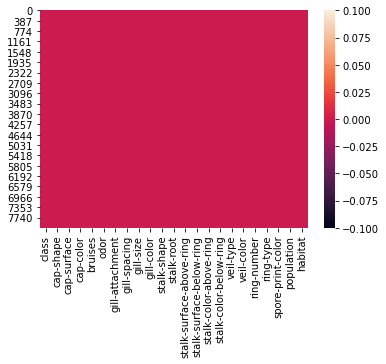

In [21]:
sb.heatmap(data.isnull())

In [24]:
# Check for Null Values
print(data.isnull().any())

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool


In [25]:
# Split the data into train and test
poisonous = data["class"].copy() # looking into one variable
characteristics = data.drop("class", axis = 1) # characteristic into another variable
characteristics.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [27]:
isPoison = pd.get_dummies(poisonous) #Changes the categorical poison or edible into 1 and 0 depending on the edibility
character = pd.get_dummies(characteristics) #Changes the character data into 1 and 0 for each characteristic
print(isPoison) #Prints isPoison to show the dummy structure

      e  p
0     0  1
1     1  0
2     1  0
3     0  1
4     1  0
...  .. ..
8119  1  0
8120  1  0
8121  1  0
8122  0  1
8123  1  0

[8124 rows x 2 columns]


In [35]:
charaTrain, charaTest, poiTrain, poiTest = train_test_split(character, isPoison)

In [36]:
model = DecisionTreeClassifier()
model.fit(charaTrain, poiTrain)

DecisionTreeClassifier()

In [38]:
poiTest.reset_index(drop=True, inplace=True) #Reset the poiTest index for iteration
poison = [] #A list used to hold poiTest data in the form [[e,p]]
score = 0 #A score count for the model predictions
predict = model.predict(charaTest) #Use the model to predict edibility

#For loop to put poiTest into the poison list in the format [[e,p]], which is how the predictions come out
for i in range(0,len(poiTest)):
    poison.append([poiTest["e"][i], poiTest["p"][i]]) #Append edibility status into the poison list
    
predictLength = len(predict) #Move the length calculation so it is not calculated every time the loop is run
    
#For loop to compare the poisonous status to the predicted poisonous status
for i in range(0 , predictLength):
    if predict[i][0] ==  poison[i][0]: #If the prediction and actual have the same starting value, thus the same overall value
        score += 1 #Add one to the score

print("This tree model predicted {} out of {} correctly, which gives an accuracy of {}%".format(score, predictLength, int(score/predictLength * 100))) #Print the score

This tree model predicted 2031 out of 2031 correctly, which gives an accuracy of 100%


In [50]:
y=data.iloc[:,-1]

In [51]:
y.head()

0    u
1    g
2    m
3    u
4    g
Name: habitat, dtype: object

In [54]:
x=data.iloc[:,0:8]

In [55]:
x.shape

(8124, 8)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [58]:
x_train.shape

(6336, 8)

In [61]:
x_test.shape

(1788, 8)

In [62]:
y_train.shape

(6336,)

In [63]:
y_test.shape

(1788,)